## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results)
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = (combined_df.drop_duplicates(subset='Mouse ID'))
print(f'Number of Mice: {len(number_mice)}')

Number of Mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
new_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
thenewnew = combined_df.duplicated(keep='last')
print(thenewnew)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Checking the number of mice in the clean DataFrame.
new_number = (new_df.drop_duplicates(subset='Mouse ID'))
print(f'Number of Mice: {len(new_number)}')

Number of Mice: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

newnew = new_df[['Drug Regimen', 'Tumor Volume (mm3)']]
grouped = newnew.groupby(newnew['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
grouped = grouped.rename(columns={'mean':'Mean','median':'Median','var':'Variance','std':'Std Deviation','sem':'SEM'})
grouped


Tumor Volume (mm3)                                              
                           Mean     Median   Variance Std Deviation       SEM
Drug Regimen                                                                 
Capomulin             40.675741  41.557809  24.947764      4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177      6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684      6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577      8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479      8.134708  0.596466
Placebo               54.033581  52.288934  61.168083      7.821003  0.581331
Propriva              52.458254  50.854632  44.053659      6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704      4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562      7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355      6.966589  0.516398

## Bar and Pie Charts

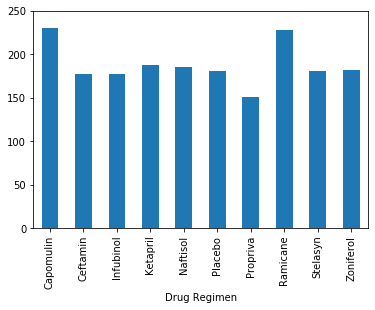

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
doing_bar_graph = new_df.groupby('Drug Regimen')
totalnumber = doing_bar_graph['Drug Regimen'].count()
count_count = totalnumber.plot(kind='bar', ylim = (0,250))
count_count


<BarContainer object of 10 artists>

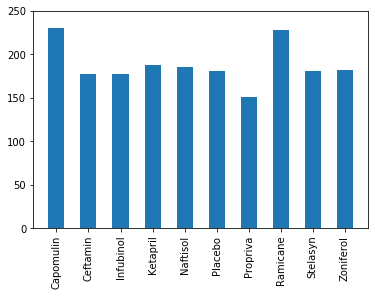

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bars = grouped.reset_index()
x_axis = bars['Drug Regimen']
# x_axis = grouped['Drug Regimen']
plt.xticks(rotation=90) 
plt.ylim(0,250)
plt.bar(x_axis,totalnumber, align='center', width=0.5)


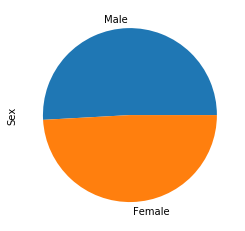

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels_gender = ['Male', 'Female']
pie_data = new_df['Sex'].value_counts()
pie_data.plot(kind='pie', labels=labels_gender)


([<matplotlib.patches.Wedge at 0x7fcad04cbf60>,
 [Text(-0.030277540496140426, 1.099583225836728, 'Male'),
  Text(0.030277540496140783, -1.099583225836728, 'Female')],
 [Text(-0.016515022088803868, 0.5997726686382152, '50.88%'),
  Text(0.016515022088804062, -0.5997726686382152, '49.12%')])

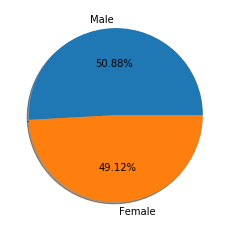

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data, labels=labels_gender, autopct='%1.2f%%', shadow=True)


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Below is to verify that the max timepoint is 45
end = new_df['Timepoint'].max()
# Start by getting the last (greatest) timepoint for each mouse
final_tumor = new_df.loc[new_df['Timepoint'] == end]
new_tumor = final_tumor[['Drug Regimen', 'Tumor Volume (mm3)']]
tumtum = new_tumor.loc[new_tumor['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
drug_names = []
get_labels_drug = tumtum['Drug Regimen'].drop_duplicates()
get_labels_drug
drug_names = get_labels_drug

In [13]:
capo_drug = tumtum.groupby(tumtum['Drug Regimen']) 
capo = capo_drug.get_group('Capomulin')

In [14]:
infu_drug = tumtum.groupby(tumtum['Drug Regimen']) 
infu = infu_drug.get_group('Infubinol') 

In [15]:
rami_drug = tumtum.groupby(tumtum['Drug Regimen']) 
rami = rami_drug.get_group('Ramicane') 

In [16]:
ceft_drug = tumtum.groupby(tumtum['Drug Regimen']) 
ceft = ceft_drug.get_group('Ceftamin') 

In [17]:
# Getting the quartiles and possible outliers for each
capo_num = capo['Tumor Volume (mm3)']
infu_num = infu['Tumor Volume (mm3)']
ceft_num = ceft['Tumor Volume (mm3)']
rami_num = rami['Tumor Volume (mm3)']

In [18]:
quartiles = capo_num.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
quartiles = rami_num.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [20]:
quartiles = ceft_num.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [21]:
quartiles = infu_num.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


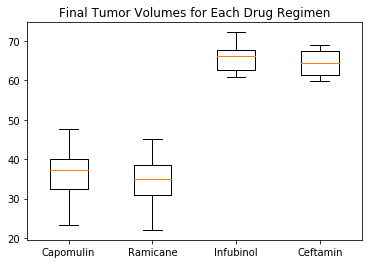

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_drug = [capo_num, rami_num, infu_num, ceft_num]
fig, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Each Drug Regimen')
ax1.boxplot(data_drug)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

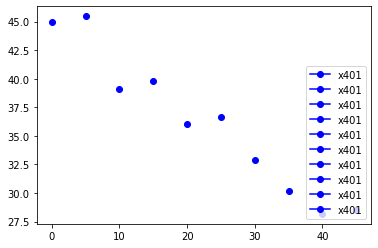

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_2 = new_df.groupby(new_df['Drug Regimen']) 
capo_3 = capo_2.get_group('Capomulin')
capo_line = capo_3[['Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
# Picked a random one from this new df (x 401)
x_401 = capo_line.loc[capo_line['Mouse ID'].isin(['x401'])]
x_401['Tumor Volume (mm3)'].astype(int)
capo_time = []
capo_time.append(x_401['Timepoint'])
capo_tumor_vol = []
capo_tumor_vol.append(x_401['Tumor Volume (mm3)'])
# Plot the line graph
plt.plot(capo_time, capo_tumor_vol, marker='o', color='blue', label="x401")
plt.legend(loc="lower right")
plt.show()

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
